In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cv2
from tqdm import tqdm

In [2]:
with open(f'./kmeans_coords.pckl','rb') as f:
    coords = pickle.load(f)

with open(f'./kmeans_fnames.pckl','rb') as f:
    fnames = pickle.load(f)

In [ ]:
train_i = {}
test_i = {}

train_xy = pd.read_csv('train.csv')
train_path = train_xy['id'].values
test_path = pd.read_csv('imagenames.csv')['id'].values

for f in train_path:
    i = cv2.imread('./train/' + f + '.jpg')
    train_i[f] = i
for f in test_path:
    i = cv2.imread('./test/' + f + '.jpg')
    test_i[f] = i

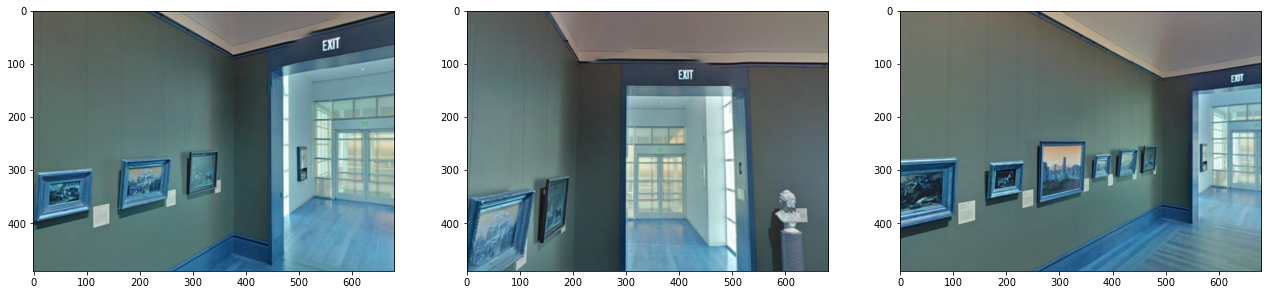

In [ ]:
_,ax = plt.subplots(1,3,figsize=(22,6))
ax[0].imshow(train_i['IMG3375_4'])
ax[1].imshow(train_i['IMG3985_2'])
ax[2].imshow(train_i['IMG3473_3'])

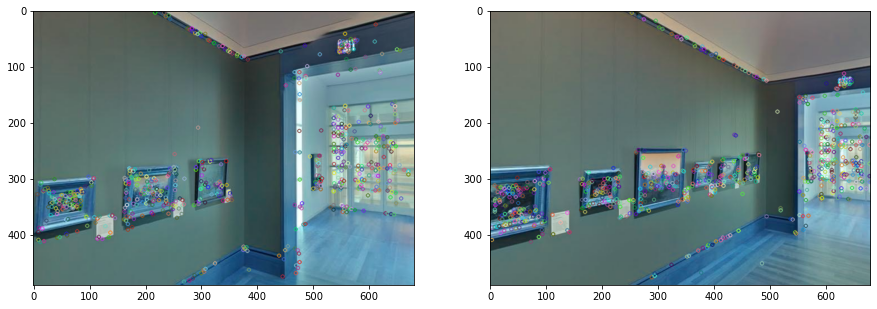

In [108]:
#img = train_i['IMG3375_4']
#img = train_i['IMG3018_5']
img = cv2.imread('./train/' + 'IMG3375_4' + '.jpg')#train_i['IMG3300_1']
img2 = cv2.imread('./train/' + 'IMG3473_3' + '.jpg')#test_i['IMG4290_4']
img3 = cv2.imread('./train/' + 'IMG3985_2' + '.jpg')
#img2 = train_i['IMG3473_3']
#img2 = train_i['IMG3985_2']

sift = cv2.SIFT_create()

kp,des = sift.detectAndCompute(img,None)
kp_draw = cv2.drawKeypoints(img,kp,None)

kp2,des2 = sift.detectAndCompute(img2,None)
kp_draw2 = cv2.drawKeypoints(img2,kp2,None)

kp3,des3 = sift.detectAndCompute(img2,None)

_,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].imshow(kp_draw)
ax[1].imshow(kp_draw2)

44

Number of successful matches between two images:  34


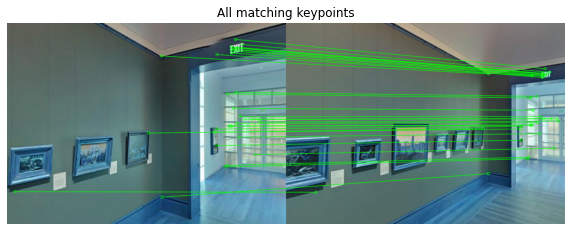

(-0.5, 999.5, 599.5, -0.5)

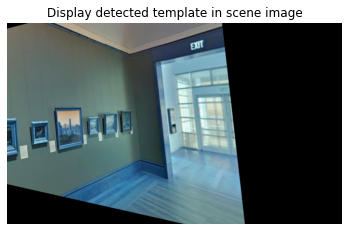

In [7]:
# FLANN parameters and initialize
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Matching descriptor using KNN algorithm
matches = flann.knnMatch(des,des2,k=2)

# Store all good matches as per Lowe's Ratio test.
ratio = 0.6
good = []
for m,n in matches:
    if m.distance < ratio*n.distance:
        good.append(m)
print(len(good))
# Set a condition that at least MIN_MATCH_NUM matches are required to find the object. 
MIN_MATCH_NUM = 4

if len(good)> MIN_MATCH_NUM:
    # If enough matches are found, we extract the positions of the matched keypoints in both images. 
    # They are passed to find the perspective transformation. 
    
    # Estimate homography between two images
    ptsA = np.float32([kp[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    ptsB = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    H, status = cv2.findHomography(ptsA, 
                                   ptsB, 
                                   cv2.RANSAC, 
                                   ransacReprojThreshold = 25, 
                                   maxIters = 500)

    matchesMask = status.ravel().tolist()
    # Draw detected template in scene image
    imgOut = cv2.warpPerspective(img2, H, (1000,600),
                             flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    
    # Print total number of successful matches between two images
    print("\nNumber of successful matches between two images: ", matchesMask.count(1))

# Draw our inliers (if successfully found the object) or all matching keypoints (if failed)
draw_params = dict(matchColor = (0,255,0), # draw in a specific colour
                   singlePointColor = (255,0,0), # draw in a specific colour
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

success_matches = cv2.drawMatches(img,kp,img2,kp2,good,None,**draw_params)


# Plotting results
plt.subplots(figsize=(10, 10)) 

plt.imshow(success_matches)
plt.title('All matching keypoints')
plt.axis('off')
plt.show()

plt.imshow(imgOut, 'gray')
plt.title('Display detected template in scene image')
plt.axis('off')

In [111]:
matches = flann.knnMatch(des2,des3,k=2)
ratio = 0.6
good = []
for m,n in matches:
    if m.distance < ratio*n.distance:
        good.append(m)
        print(kp[m.queryIdx].pt)

#ptsC = np.float32([kp[m.queryIdx].pt for m in good]).reshape(-1,1,2)
#ptsD = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

(7.526798725128174, 327.8409423828125)
(7.526798725128174, 327.8409423828125)
(9.044269561767578, 394.9873962402344)
(9.260845184326172, 408.9913330078125)
(10.503738403320312, 387.5365905761719)
(12.388956069946289, 412.7601013183594)
(12.516997337341309, 310.69580078125)
(14.200936317443848, 307.0787658691406)
(16.325237274169922, 388.7978820800781)
(18.017868041992188, 322.5855712890625)
(18.165489196777344, 321.07476806640625)
(19.042158126831055, 411.1112976074219)
(19.39198875427246, 412.00689697265625)
(20.907852172851562, 379.942626953125)
(20.907852172851562, 379.942626953125)
(21.12117576599121, 318.185791015625)
(21.12117576599121, 318.185791015625)
(23.562999725341797, 375.05084228515625)
(25.738304138183594, 316.302978515625)
(26.88536262512207, 350.5668640136719)
(27.5123291015625, 321.4297180175781)
(28.18050193786621, 326.13812255859375)
(30.00992202758789, 343.7440185546875)
(31.13572883605957, 364.88812255859375)
(32.90718078613281, 350.15631103515625)
(33.30738449096

IndexError: list index out of range

In [112]:
matches = flann.knnMatch(des2,des3,k=2)

# Store all good matches as per Lowe's Ratio test.
ratio = 0.6
good = []
for m,n in matches:
    if m.distance < ratio*n.distance:
        good.append(m)
print(len(good))
# Set a condition that at least MIN_MATCH_NUM matches are required to find the object. 
MIN_MATCH_NUM = 4

if len(good)> MIN_MATCH_NUM:
    # If enough matches are found, we extract the positions of the matched keypoints in both images. 
    # They are passed to find the perspective transformation. 
    
    # Estimate homography between two images
    ptsC = np.float32([kp2[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    ptsD = np.float32([kp3[m.trainIdx].pt for m in good]).reshape(-1,1,2)

832


In [67]:
pt1 = train_xy.loc[train_xy['id']=='IMG3375_4',['x','y']].values
pt2 = train_xy.loc[train_xy['id']=='IMG3473_3',['x','y']].values
pt3 = train_xy.loc[train_xy['id']=='IMG3985_2',['x','y']].values
print(pt1,pt2)
print(pt1-pt2)
print(pt1,pt3)
print(pt1-pt3)

[[ 28.11932192 -73.01728035]] [[ 26.41932192 -70.61728035]]
[[ 1.7 -2.4]]
[[ 28.11932192 -73.01728035]] [[ 29.61932192 -72.41728035]]
[[-1.5 -0.6]]


In [9]:
FOV_X = 73.3*np.pi/180
FOV_Y = 53.1*np.pi/180

cx = img.shape[1]/2
cy = img.shape[0]/2

fx = cx/np.tan(FOV_X/2)
fy = cy/np.tan(FOV_Y/2)

K = np.array([[fx,0,cx],
              [0,fy,cy],
              [0,0,1]])

E,_ = cv2.findEssentialMat(ptsA,ptsB,K,method=cv2.FM_LMEDS)
_,R,T,_ = cv2.recoverPose(E,ptsA,ptsB,K)

array([[ 0.59514338],
       [-0.04947995],
       [ 0.80209481]])

In [113]:
E2,_ = cv2.findEssentialMat(ptsC,ptsD,K,method=cv2.FM_LMEDS)
_,R2,T2,_ = cv2.recoverPose(E2,ptsC,ptsD,K)

In [40]:
np.arccos(R[0,0]/R[1,1])

0.06622713551269852

In [58]:
dp = pt1-pt2
angle = np.arccos(R[0,0]/R[1,1]) + np.arctan2(dp[0,0],dp[0,1])

In [64]:
r2d = cv2.getRotationMatrix2D([0,0],angle,1)
r3d = np.array([[r2d[0,0], 0, r2d[0,1]],
               [0, 1, 0],
               [r2d[1,0], 0, r2d[1,1]]])
r3d

array([[ 0.99897727,  0.        ,  0.04521519],
       [ 0.        ,  1.        ,  0.        ],
       [-0.04521519,  0.        ,  0.99897727]])

In [86]:
V1 = r3d @ T
V1

array([[ 0.63080158],
       [-0.04947995],
       [ 0.77436497]])

In [85]:
_,Rx,Tx,_ = cv2.recoverPose(E.T,ptsB,ptsA,K)
R @ Tx

array([[-0.59514338],
       [ 0.04947995],
       [-0.80209481]])

In [76]:
T

array([[ 0.59514338],
       [-0.04947995],
       [ 0.80209481]])

In [114]:
V2 = r3d @ (R @ T2)
V2

array([[ 0.63966914],
       [-0.5723858 ],
       [ 0.51302815]])

In [115]:
unit_vectors = np.append(V1[[0,2]],V2[[0,2]], axis=1)
# Solve this matrix and get b: V[b,c]' = D
const = np.linalg.solve(unit_vectors,dp.T)[0,0]
const

-14.019194853726345

In [118]:
pt1 + const * V1[[0,2]].flatten()

array([[ 19.27599168, -83.87325372]])